변수들의 상관성을 분석하하는 파일 입니다.

연속형은 피어슨 상관계수

이산형은 크레머 상관계수를 통해 분석합니다.



In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')


In [ ]:
# 사용하기 전 변경해주어야 하는 파라미터
BASE_WORKING_DIR = "/content/gdrive/My Drive/weather_bigcontest/4_code/"
#BASE_WORKING_DIR = "/content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/"
USERNAME = "park"

In [ ]:
import os
# 사용하는 디렉토리 정의
DATA_BASE_PATH = os.path.join(BASE_WORKING_DIR, "data")
DATA_RAW_PATH = os.path.join(DATA_BASE_PATH, "raw")
DATA_EXPORT_PATH = os.path.join(DATA_BASE_PATH, "export")
DATA_CONV_USER_PATH = os.path.join(DATA_BASE_PATH, USERNAME)
DATA_CONV_PATH = os.path.join(DATA_BASE_PATH, "converted")
MODEL_PATH = os.path.join(BASE_WORKING_DIR, "model")
RESULT_PATH = os.path.join(BASE_WORKING_DIR, "result")

WORKING_DIR = os.path.join(BASE_WORKING_DIR, USERNAME)

print('Current Work Directory :',  os.getcwd(), '\n')
print('Username :',  USERNAME, '\n')

print("DATA_BASE_PATH : ", DATA_BASE_PATH)
print("DATA_RAW_PATH : ", DATA_RAW_PATH)
print("DATA_EXPORT_PATH : ", DATA_EXPORT_PATH)
print("DATA_CONV_USER_PATH : ", DATA_CONV_USER_PATH)
print("DATA_CONV_PATH : ", DATA_CONV_PATH)

print("MODEL_PATH : ", MODEL_PATH)

print("RESULT_PATH : ", RESULT_PATH)

print("WORKING_DIR : ", WORKING_DIR)


Current Work Directory : /content 

Username : park 

DATA_BASE_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/data
DATA_RAW_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/data/raw
DATA_EXPORT_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/data/export
DATA_CONV_USER_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/data/park
DATA_CONV_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/data/converted
MODEL_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/model
RESULT_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/result
WORKING_DIR :  /content/gdrive/My Drive/weather_bigcontest/4_code/park


In [ ]:
# 데이터 무엇이 있는지 확인하자.
# 아래 코드를 수행하게 되면, "../input/"에서 리눅스 명령어 "ls"를 수행한 결과를 보여주게 된다. 이 때 나온 binary code를 "utf8"로 디코딩해서 보여준다.
from subprocess import check_output
print("===== Raw Data List =====\n", check_output(["ls", DATA_RAW_PATH]).decode("utf8"))
print("===== Export Data List =====\n" ,check_output(["ls", DATA_EXPORT_PATH]).decode("utf8"))
print("===== Converted User Data List =====\n" ,check_output(["ls", DATA_CONV_USER_PATH]).decode("utf8"))
print("===== Converted Data List =====\n" ,check_output(["ls", DATA_CONV_PATH]).decode("utf8"))
print("===== Model List =====\n" ,check_output(["ls", MODEL_PATH]).decode("utf8"))
print("===== Result file List =====\n" ,check_output(["ls", RESULT_PATH]).decode("utf8"))

===== Raw Data List =====
 plant1_train.csv
plant2_train.csv
plant2_train.gsheet
plant_test.csv
submit.csv
submit.gsheet

===== Export Data List =====
 dangjin_aws
seosan_asos
sinpyeong_aws
songak_forecast
songak_local
songsan_forecast
songsan_local

===== Converted User Data List =====
 backup_0.96model
data_all.csv
data_all_out.csv
data_all_out_in.csv
date_trend.csv
date_trend_point.csv
ExtraTreesClassifier_th_10.csv
GradientBoostingClassifier_all_feature_th_40.csv
lastplus_th_10.csv
last_th_08.csv
last_th_10.csv
model
model_cond_all.pkl
model_cond_all_plus_.pkl
model_hum_in.pkl
model_hum_out_loc.pkl
model_tem_coil.pkl
model_tem_in.pkl
model_tem_out_loc.pkl
plant1_by_loc.csv
plant1_by_loc.gsheet
plant2_by_loc.csv
plant_test_all_weather_feature_add_cluster_add_out.csv
plant_test_all_weather_feature_add_cluster_add_out_in.csv
plant_test_all_weather_feature_add_cluster_add_out_in.gsheet
plant_train_all_weather_feature_add_cluster.csv
predict.csv
RandomForestClassifier_th_10.csv
result.c

In [ ]:
# 기본 데이터 라이브러리 로드
import sys # 시스템 파라미터에 접근할 수 있게 도와준다.
print("Python version: {}". format(sys.version))

import pandas as pd # 데이터 정제에 도움을 주는 라이브러리
print("pandas version: {}". format(pd.__version__))

import matplotlib # 매트랩에서 사용하는 시각화 도구를 사용할 수 있게 도와주는 시각화 도구
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np # 행렬 계산을 위해 필요한 라이브러리
print("NumPy version: {}". format(np.__version__))

import scipy as sp # 수학 관련 함수가 내장된 라이브러리
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display # 주피터 노트북에서 예쁘게 시각화 해주는 도구
print("IPython version: {}". format(IPython.__version__)) 

import sklearn # 각종 통계 도구와 머신 러닝 알고리즘이 내장되어 있는 라이브러리
print("scikit-learn version: {}". format(sklearn.__version__))

# 파이썬 내장 라이브러리
import random
import time
import os
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import copy


# Jupyter Notebook 이나 ipython 을 사용하다보면 향후 버전이 올라갈 때 변경될 사항 등을 알려주는 경고 메시지(warning message)를 뜨지 않게 해준다.
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
pandas version: 1.0.5
matplotlib version: 3.2.2
NumPy version: 1.18.5
SciPy version: 1.4.1
IPython version: 5.5.0
scikit-learn version: 0.22.2.post1
-------------------------


In [ ]:
# 모델링 라이브러리, 수학 계산 툴 로드
# 일반적인 모델링 라이브러리
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# 모델링 시 헬퍼 함수들
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.externals import joblib

# interpolation 함수
import scipy.interpolate as spi

# pickle
import pickle

# 시각화 도구
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# 시각화 도구 default 세팅
# 주피터 노트북에서 plot 결과를 볼 수 있게 해준다.
%matplotlib inline
mpl.style.use('ggplot') # matplotlib에서 plot되는 결과를 선택할 수 있다.
sns.set_style('white') # seaborn에서 사용할 style을 설정할 수 있다.
pylab.rcParams['figure.figsize'] = 12,8 # plot의 크기와 선 등의 기본 값을 설정할 수 있다.

# 시각화 Style 설정하기
# print(plt.style.available)
# ['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']

plt.style.use(['fivethirtyeight'])
sns.set_style('darkgrid')

In [ ]:
data_plant = pd.read_csv(os.path.join(DATA_CONV_PATH, "data_plant_train_trend_point.csv"))

# unnamed: 0 제거
data_plant.drop(['Unnamed: 0'], axis='columns', inplace=True)

data_plant

,mea_ddhr,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc,hum_out_loc,cond_loc,date,time,dangjin-ta,dangjin-hm,dangjin-ws,dangjin-rn,sinpyeong-ta,sinpyeong-ws,sinpyeong-rn,sinpyeong-lp,sinpyeong-ap,seosan-ta,seosan-hm,seosan-ws,seosan-rn,seosan-dew,seosan-sp,seosan-lp,seosan-ap,seosan-sr,seosan-ss,seosan-ground,songsan-ta,songsan-hm,songsan-ws,songsan-rn,songak-ta,songak-hm,songak-ws,songak-rn,seosan-ta-trend,seosan-hm-trend,seosan-ground-trend,seosan-ta-point,seosan-hm-point,seosan-ground-point,seosan-ta-changed,seosan-hm-changed,seosan-ground-changed,tem_out_loc-trend,hum_out_loc-trend,tem_in-trend,hum_in-trend,tem_coil-trend,tem_out_loc-point,hum_out_loc-point,tem_in-point,hum_in-point,tem_coil-point
0,2016-04-01 00:00:00,1.0,1.0,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-01,0.0,6.800000,41.20,0.300000,0.0,7.2,0.900000,0.0,1013.000000,1015.700000,8.800000,41.000000,1.500000,0.0,-3.700000,4.600000,1012.100000,1015.600000,0.0,0.0,4.000000,14.00,40.000000,0.600000,0.0,13.800000,38.000000,0.400000,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,3,1,1,2,2,4,2,2,2,1
1,2016-04-01 00:00:00,1.0,2.0,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-01,0.0,6.800000,41.20,0.300000,0.0,7.2,0.900000,0.0,1013.000000,1015.700000,8.800000,41.000000,1.500000,0.0,-3.700000,4.600000,1012.100000,1015.600000,0.0,0.0,4.000000,14.00,40.000000,0.600000,0.0,13.800000,38.000000,0.400000,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,4,1,2,0,2,2,0,3,2,3
2,2016-04-01 00:00:00,1.0,3.0,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-01,0.0,6.800000,41.20,0.300000,0.0,7.2,0.900000,0.0,1013.000000,1015.700000,8.800000,41.000000,1.500000,0.0,-3.700000,4.600000,1012.100000,1015.600000,0.0,0.0,4.000000,14.00,40.000000,0.600000,0.0,13.800000,38.000000,0.400000,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,2,2,4,4,3,0,0,0,2,2
3,2016-04-01 03:00:00,1.0,1.0,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-01,180.0,5.200000,52.10,0.200000,0.0,4.7,0.300000,0.0,1012.200000,1014.900000,7.500000,40.000000,0.400000,0.0,-5.200000,4.200000,1011.400000,1014.900000,0.0,0.0,2.800000,19.60,24.000000,0.700000,0.0,20.200001,22.000000,1.000000,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,3,1,1,2,2,4,2,2,2,1
4,2016-04-01 03:00:00,1.0,2.0,12.00,32.00,9.00,7.00,59.00,0.0,2016-04-01,180.0,5.200000,52.10,0.200000,0.0,4.7,0.300000,0.0,1012.200000,1014.900000,7.500000,40.000000,0.400000,0.0,-5.200000,4.200000,1011.400000,1014.900000,0.0,0.0,2.800000,19.60,24.000000,0.700000,0.0,20.200001,22.000000,1.000000,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,4,1,2,0,2,2,0,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350361,2019-03-31 23:30:00,2.0,2.0,9.05,38.13,9.76,4.57,51.47,0.0,2019-03-31,1410.0,3.000000,51.95,0.500000,0.0,2.8,2.100000,0.0,1021.150000,1023.650000,3.200000,58.500000,1.900000,0.0,-4.100000,4.550000,1020.850000,1024.050000,0.0,0.0,2.000000,8.15,24.500000,4.150000,0.0,8.150000,24.500000,4.150000,0.0,3,2,4,4,4,1,5.397598,46.997998,17.498498,4,2,3,0,3,3,3,1,3,4
350362,2019-03-31 23:30:00,2.0,3.0,8.32,39.13,9.49,4.57,51.47,0.0,2019-03-31,1410.0,3.000000,51.95,0.500000,0.0,2.8,2.100000,0.0,1021.150000,1023.650000,3.200000,58.500000,1.900000,0.0,-4.100000,4.550000,1020.850000,1024.050000,0.0,0.0,2.000000,8.15,24.500000,4.150000,0.0,8.150000,24.500000,4.150000,0.0,3,2,4,4,4,1,5.397598,46.997998,17.498498,4,3,0,3,0,1,3,0,2,1
350363,2019-03-31 23:40:00,2.0,1.0,8.99,37.33,9.15,4.47,53.14,0.0,2019-03-31,1420.0,2.933333,52.30,0.366667,0.0,2.8,2.133333,0.0,1021.166667,1023.666667,3.133333,59.666667,1.666667,0.0,-3.866667,4.633333,1020.866667,1024.066667,0.0,0.0,1.966667,8.50,18.666667,4.433333,0.0,8.500000,18.666667,4.433333,0.0,3,2,4,4,4,1,5.397598,46.997998,17.498498,0,4,4,0,3,3,0,1,4,2
350364,2019-03-31 23:40:00,2.0,2.0,9.02,38.49,9.68,4.47,53.14,0.0,2019-03-31,1420.0,2.933333,52.30,0.366667,0.0,2.8,2.133333,0.0,1021.1666

In [ ]:
remove_list = ['mea_ddhr', 'date', 'cond_loc']
data_columns = list(data_plant.columns)
for rmv in remove_list:
  data_columns.remove(rmv)
data_columns

['plant',
 'loc',
 'tem_in',
 'hum_in',
 'tem_coil',
 'tem_out_loc',
 'hum_out_loc',
 'time',
 'dangjin-ta',
 'dangjin-hm',
 'dangjin-ws',
 'dangjin-rn',
 'sinpyeong-ta',
 'sinpyeong-ws',
 'sinpyeong-rn',
 'sinpyeong-lp',
 'sinpyeong-ap',
 'seosan-ta',
 'seosan-hm',
 'seosan-ws',
 'seosan-rn',
 'seosan-dew',
 'seosan-sp',
 'seosan-lp',
 'seosan-ap',
 'seosan-sr',
 'seosan-ss',
 'seosan-ground',
 'songsan-ta',
 'songsan-hm',
 'songsan-ws',
 'songsan-rn',
 'songak-ta',
 'songak-hm',
 'songak-ws',
 'songak-rn',
 'seosan-ta-trend',
 'seosan-hm-trend',
 'seosan-ground-trend',
 'seosan-ta-point',
 'seosan-hm-point',
 'seosan-ground-point',
 'seosan-ta-changed',
 'seosan-hm-changed',
 'seosan-ground-changed',
 'tem_out_loc-trend',
 'hum_out_loc-trend',
 'tem_in-trend',
 'hum_in-trend',
 'tem_coil-trend',
 'tem_out_loc-point',
 'hum_out_loc-point',
 'tem_in-point',
 'hum_in-point',
 'tem_coil-point']

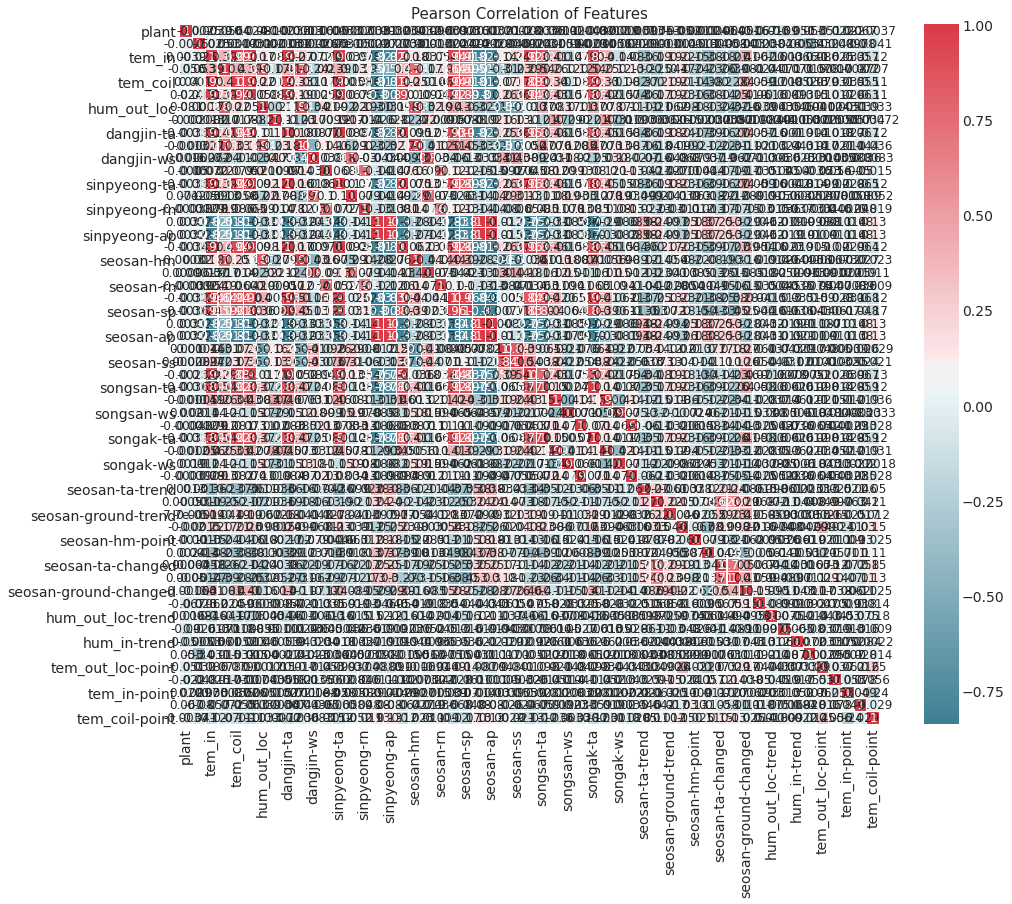

In [ ]:
def correlation_heatmap(df):
  _, ax = plt.subplots(figsize=(14, 12))
  colormap = sns.diverging_palette(220, 10, as_cmap=True)

  _ = sns.heatmap(
      df.corr(),
      cmap=colormap,
      square=True,
      ax=ax,
      annot=True,
      linewidths=0.1, vmax=1.0, linecolor='white',
      annot_kws={'fontsize':12}
  )
  plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data_plant[data_columns])

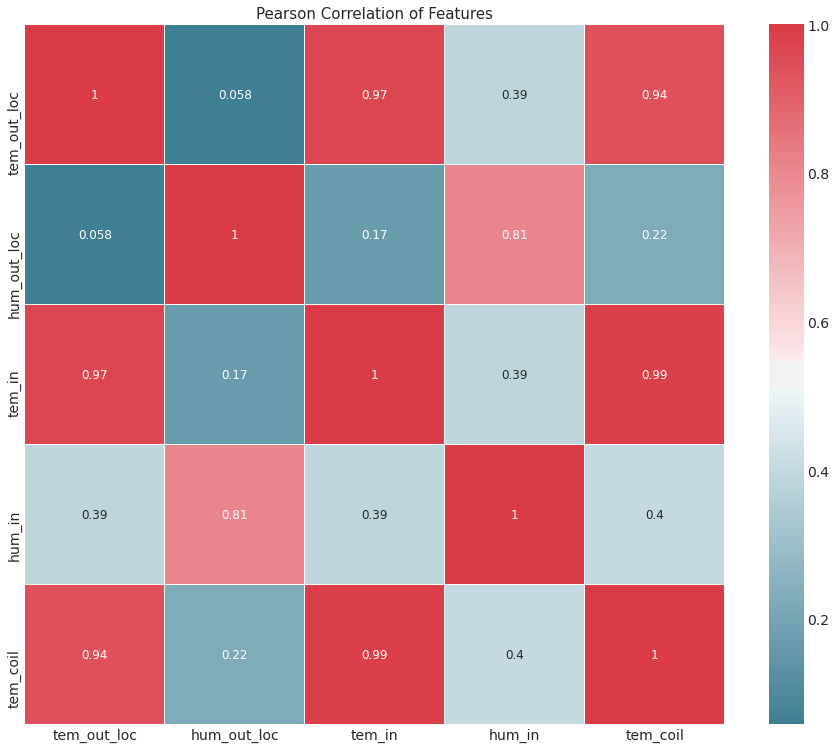

In [ ]:
correlation_heatmap(data_plant[['tem_out_loc', 'hum_out_loc', 'tem_in', 'hum_in', 'tem_coil']])

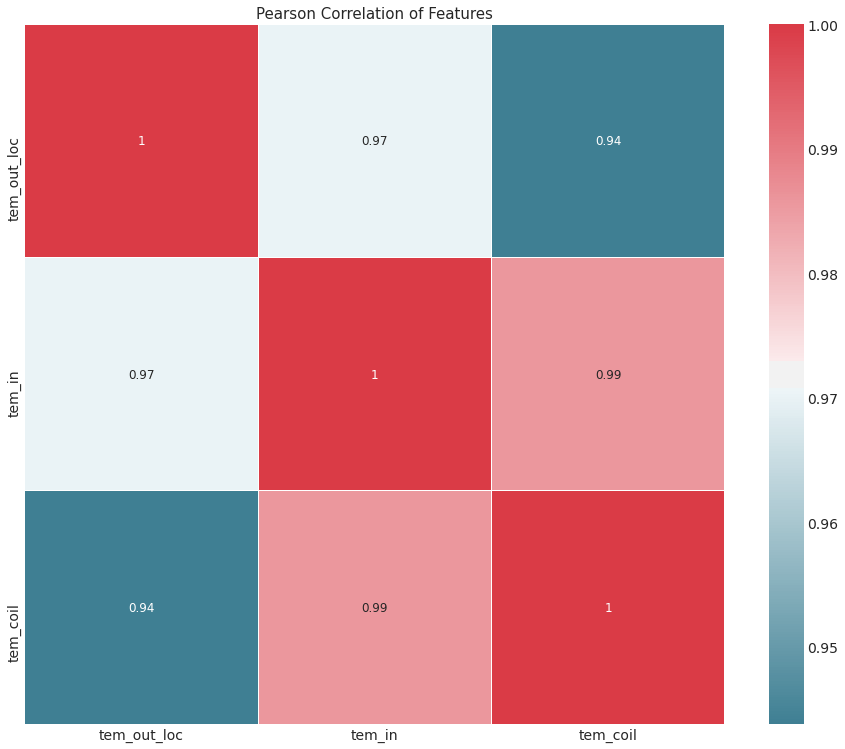

In [ ]:
correlation_heatmap(data_plant[['tem_out_loc', 'tem_in', 'tem_coil']])

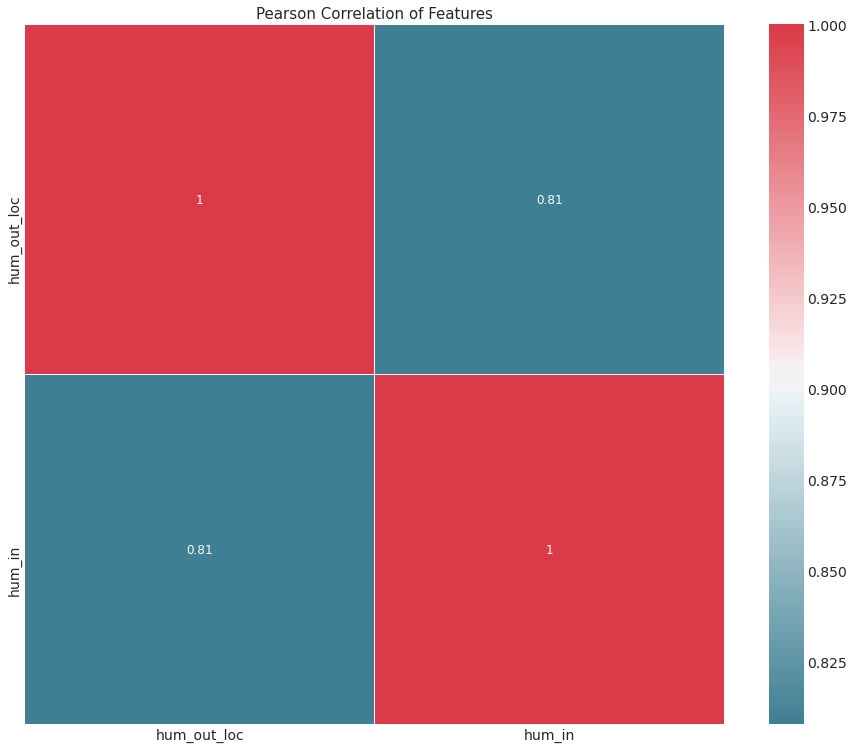

In [ ]:
correlation_heatmap(data_plant[['hum_out_loc', 'hum_in']])

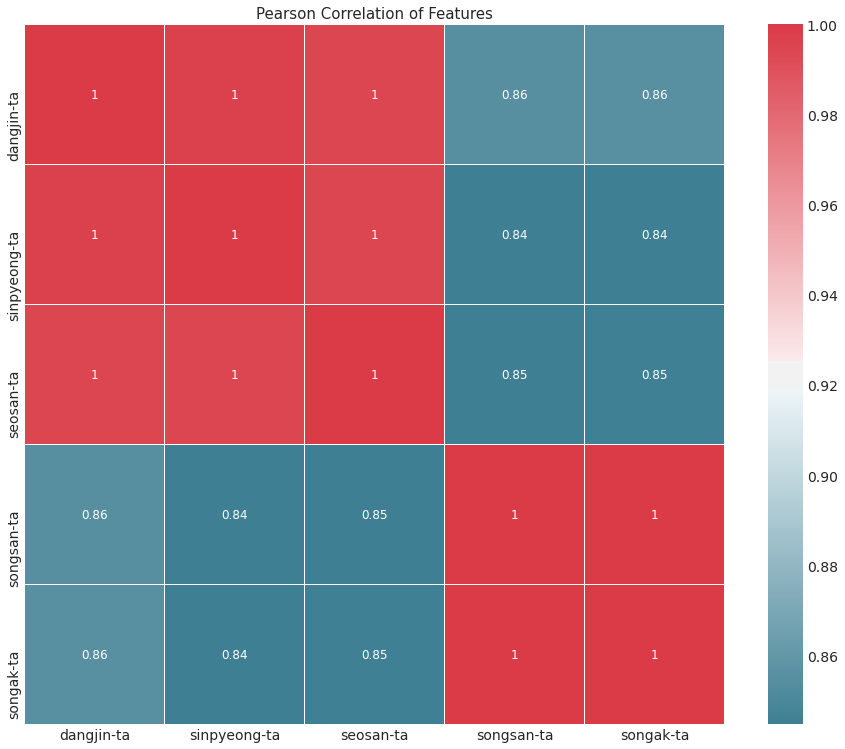

In [ ]:
correlation_heatmap(data_plant[['dangjin-ta', 'sinpyeong-ta', 'seosan-ta', 'songsan-ta', 'songak-ta']])

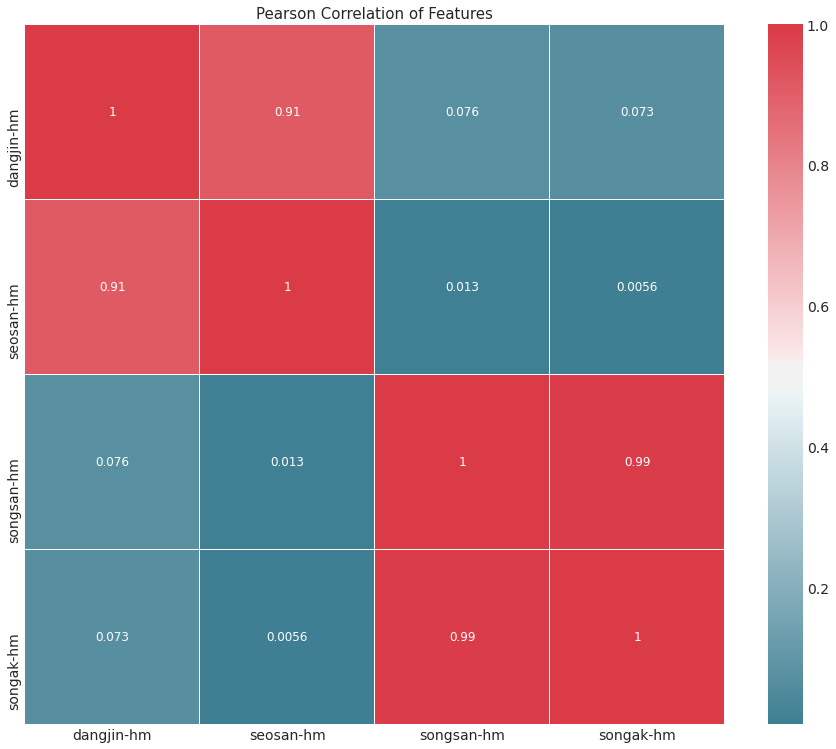

In [ ]:
correlation_heatmap(data_plant[['dangjin-hm', 'seosan-hm', 'songsan-hm', 'songak-hm']])

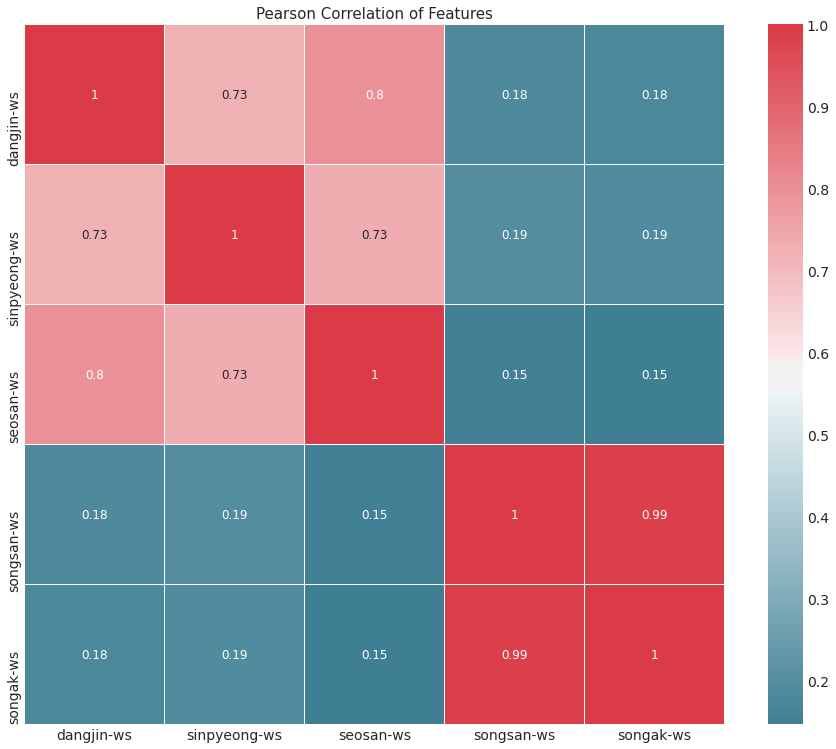

In [ ]:
correlation_heatmap(data_plant[['dangjin-ws', 'sinpyeong-ws', 'seosan-ws', 'songsan-ws', 'songak-ws']])

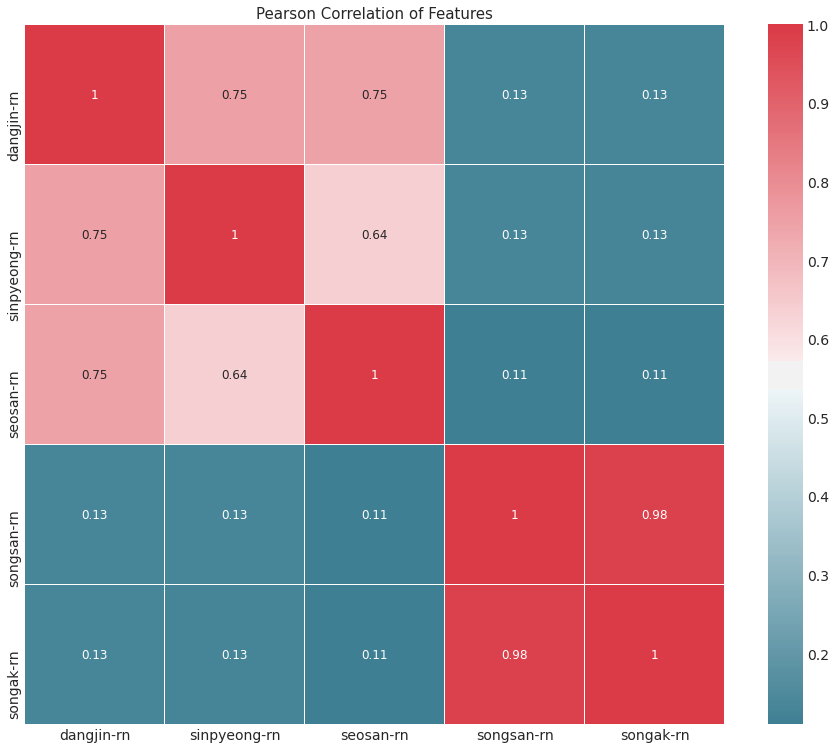

In [ ]:
correlation_heatmap(data_plant[['dangjin-rn', 'sinpyeong-rn', 'seosan-rn', 'songsan-rn', 'songak-rn']])

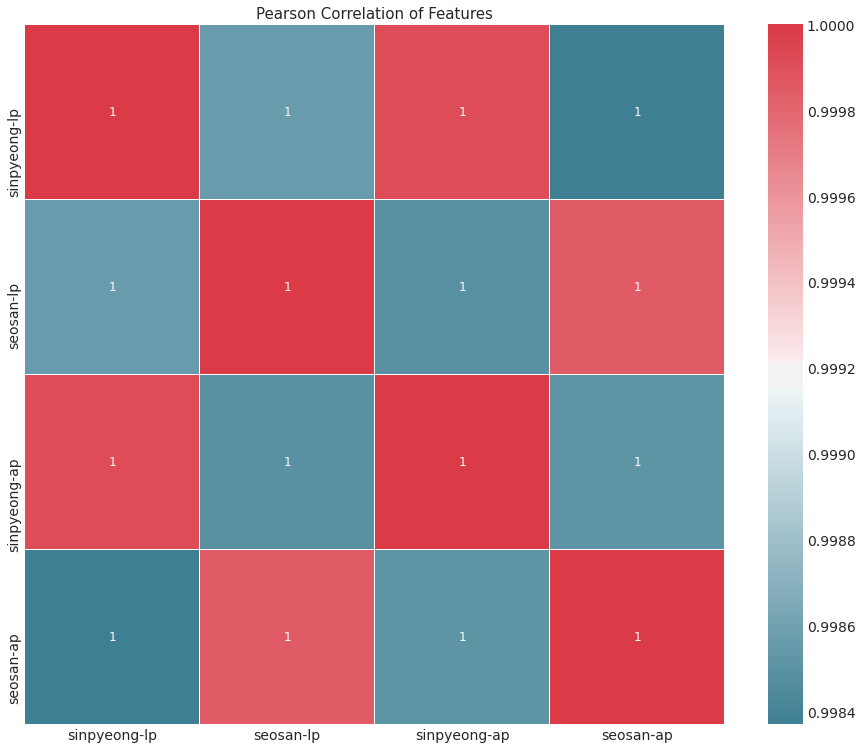

In [ ]:
correlation_heatmap(data_plant[['sinpyeong-lp', 'seosan-lp', 'sinpyeong-ap', 'seosan-ap']])

hum_in-point,0,1,2,3,4
tem_in-point,,,,,
0,12029,13306,24992,10070,8737
1,19317,11973,10076,17228,15200
2,12787,15362,16210,12752,10263
3,12861,10909,15763,21311,7101
4,11747,17348,15297,8724,19003


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

def cramers_correlation_heatmap(input_df):
  data_encoded = input_df
  rows= []
  for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
      cramers = cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
      col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
  
  cramers_results = np.array(rows)
  cramers_results
  df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
  
  _, ax = plt.subplots(figsize=(14, 12))
  colormap = sns.diverging_palette(220, 10, as_cmap=True)

  _ = sns.heatmap(
      df,
      cmap=colormap,
      square=True,
      ax=ax,
      annot=True,
      linewidths=0.1, vmax=1.0, linecolor='white',
      annot_kws={'fontsize':12}
  )
  plt.title('Pearson Correlation of Features', y=1.05, size=15)

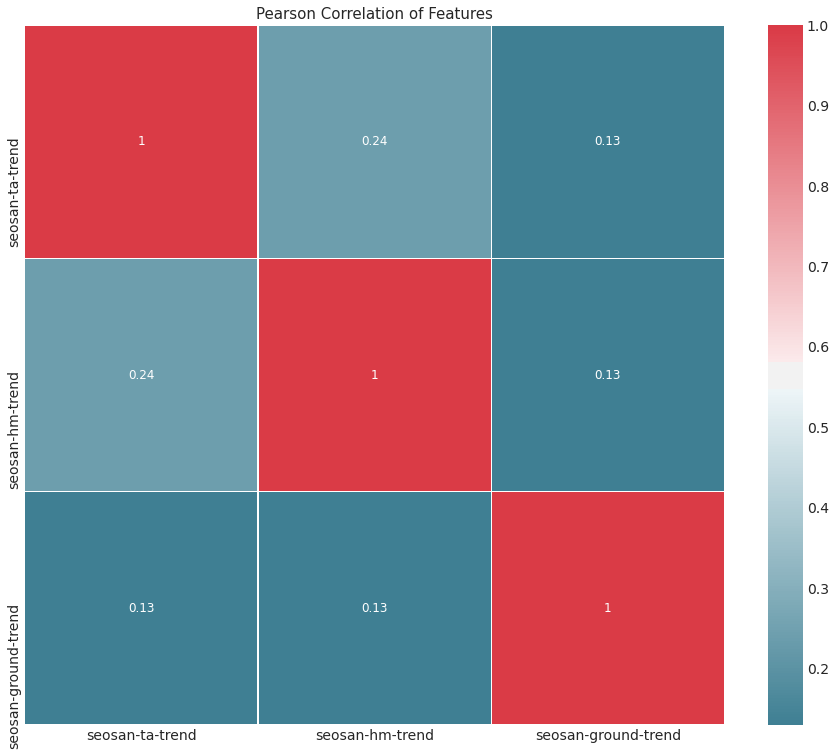

In [ ]:
cramers_correlation_heatmap(data_plant[['seosan-ta-trend', 'seosan-hm-trend', 'seosan-ground-trend']])

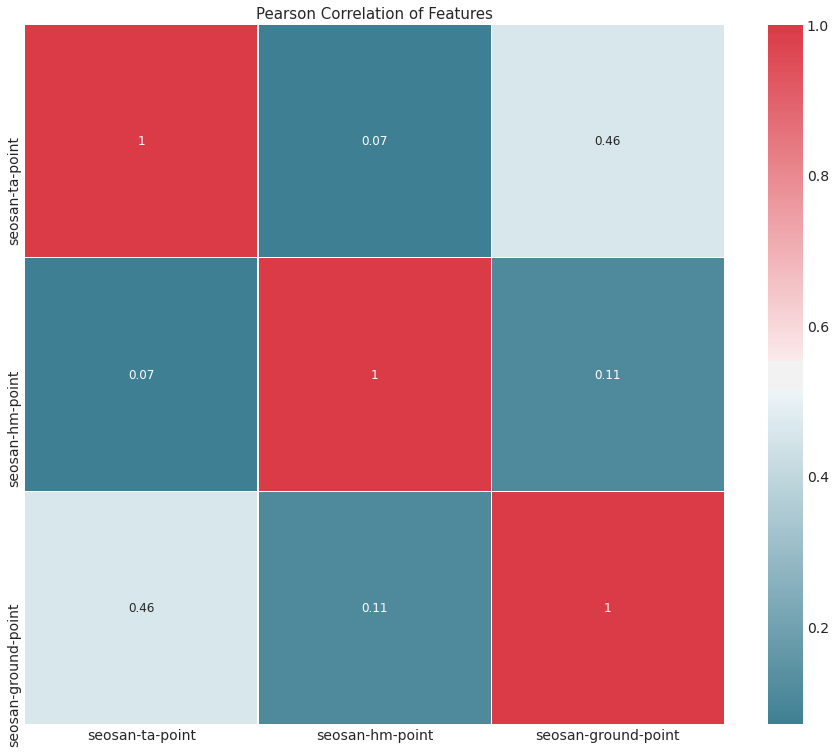

In [ ]:
cramers_correlation_heatmap(data_plant[['seosan-ta-point', 'seosan-hm-point', 'seosan-ground-point']])

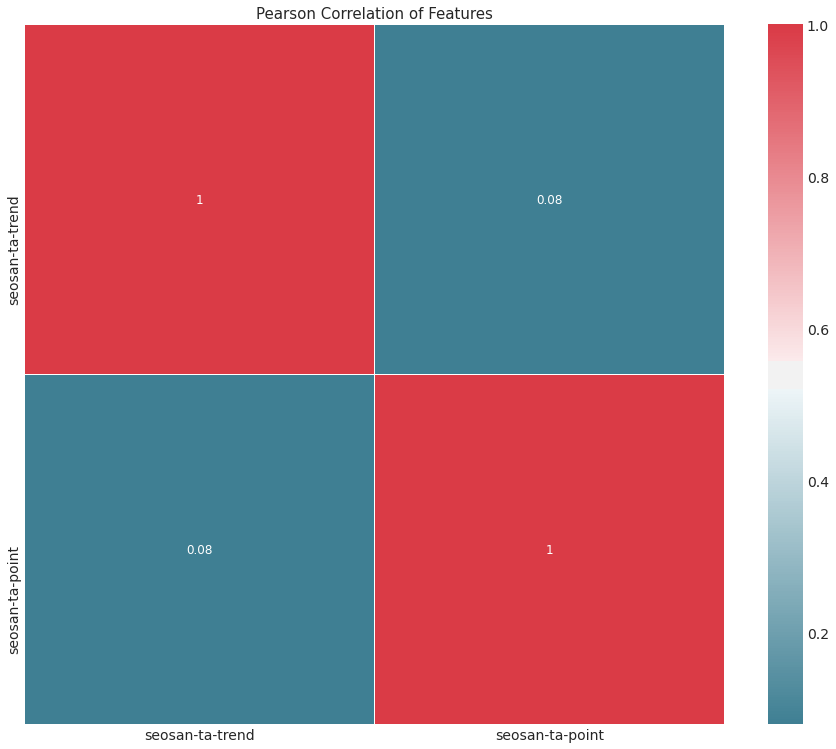

In [ ]:
cramers_correlation_heatmap(data_plant[['seosan-ta-trend', 'seosan-ta-point']])

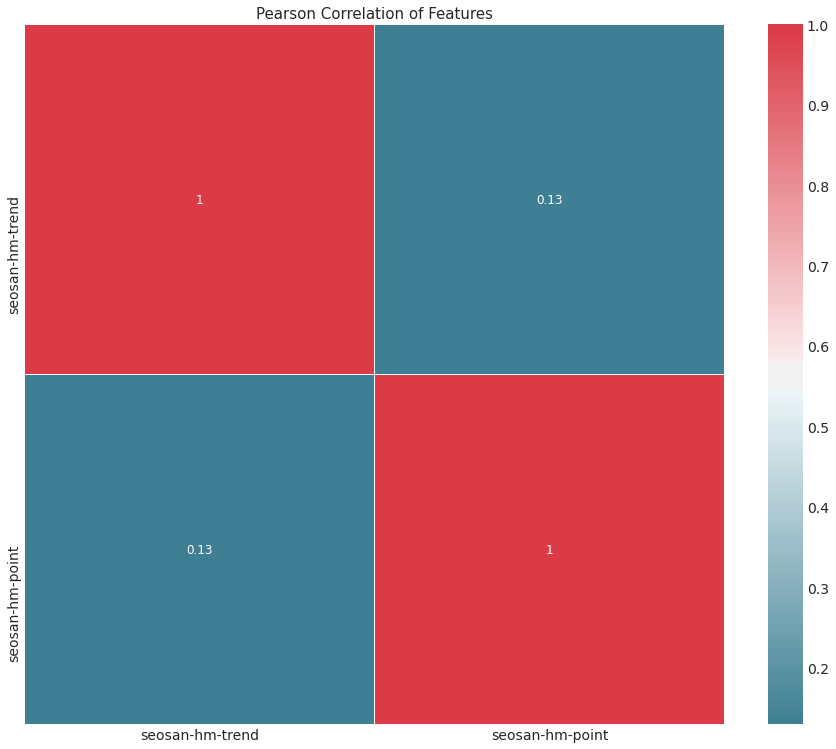

In [ ]:
cramers_correlation_heatmap(data_plant[['seosan-hm-trend', 'seosan-hm-point']])

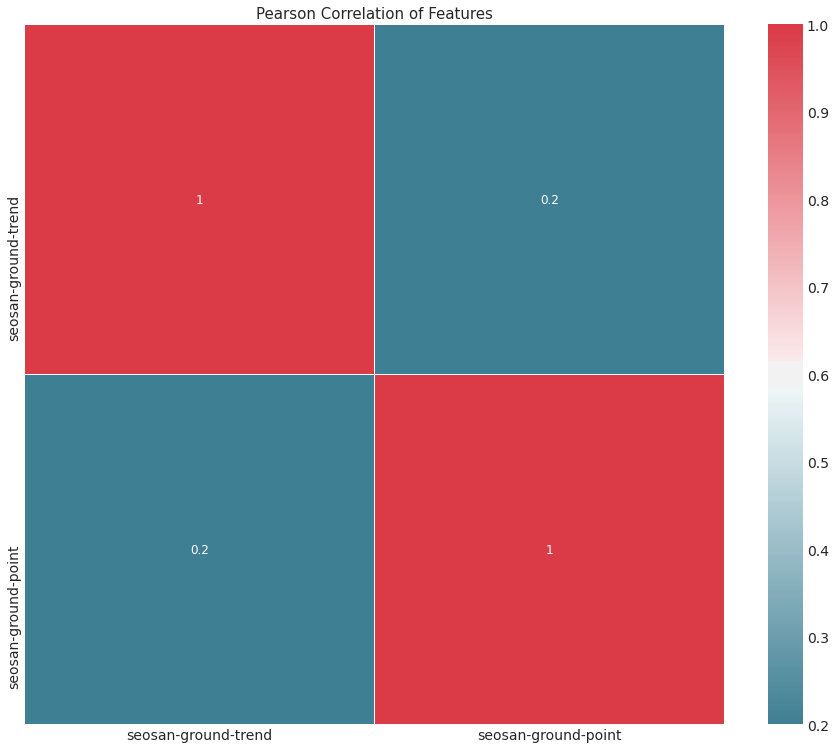

In [ ]:
cramers_correlation_heatmap(data_plant[['seosan-ground-trend', 'seosan-ground-point']])

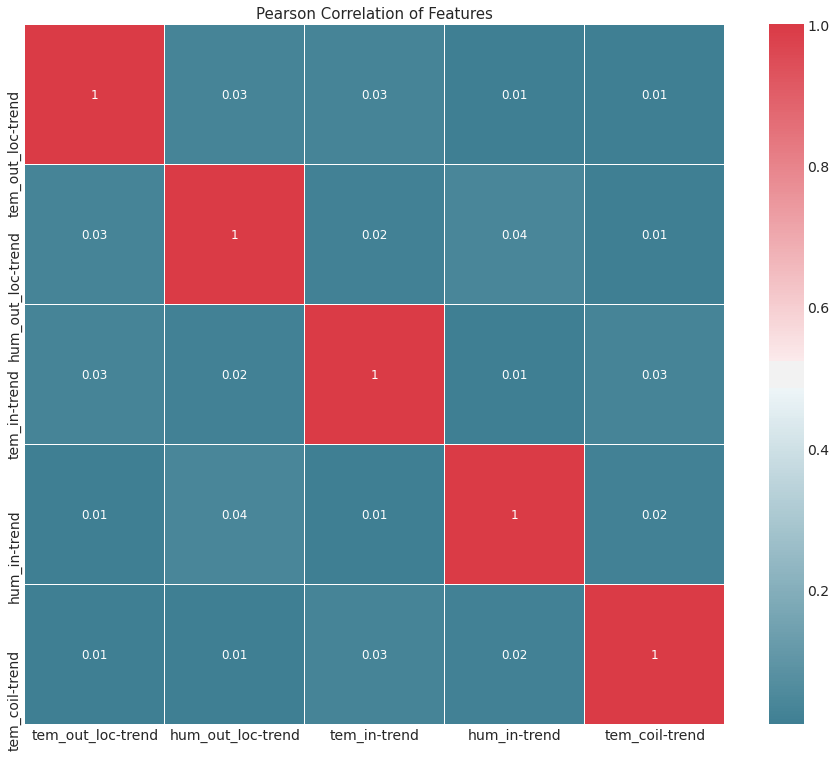

In [ ]:
cramers_correlation_heatmap(data_plant[['tem_out_loc-trend', 'hum_out_loc-trend', 'tem_in-trend', 'hum_in-trend', 'tem_coil-trend']])

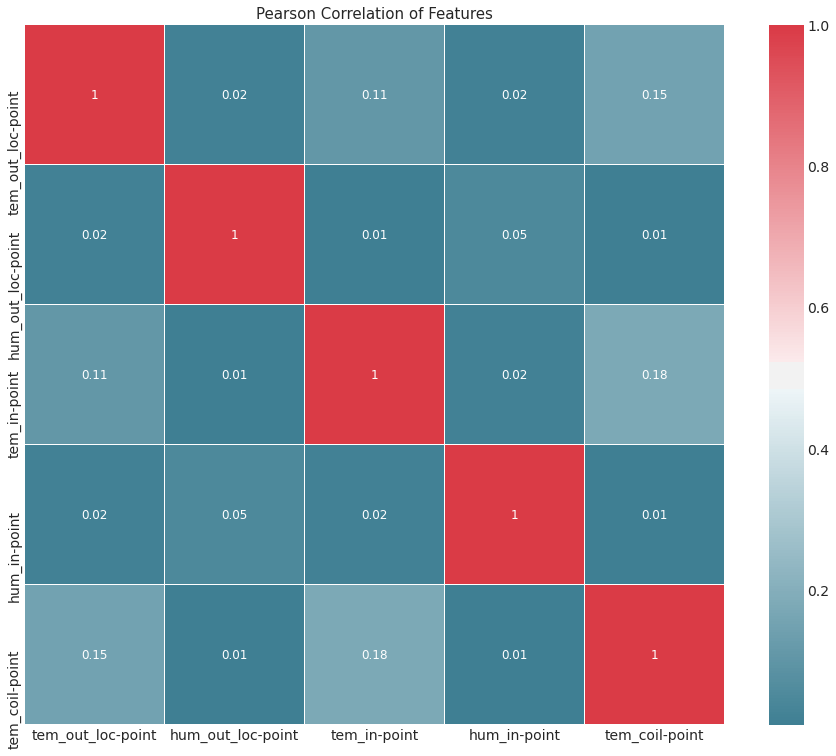

In [ ]:
cramers_correlation_heatmap(data_plant[['tem_out_loc-point', 'hum_out_loc-point', 'tem_in-point', 'hum_in-point', 'tem_coil-point']])

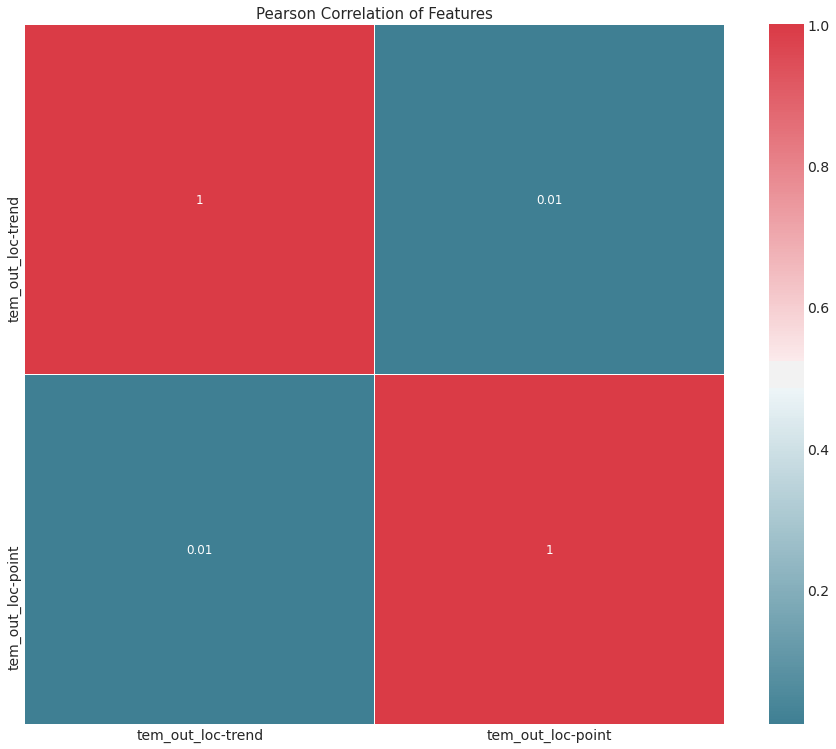

In [ ]:
cramers_correlation_heatmap(data_plant[['tem_out_loc-trend', 'tem_out_loc-point']])

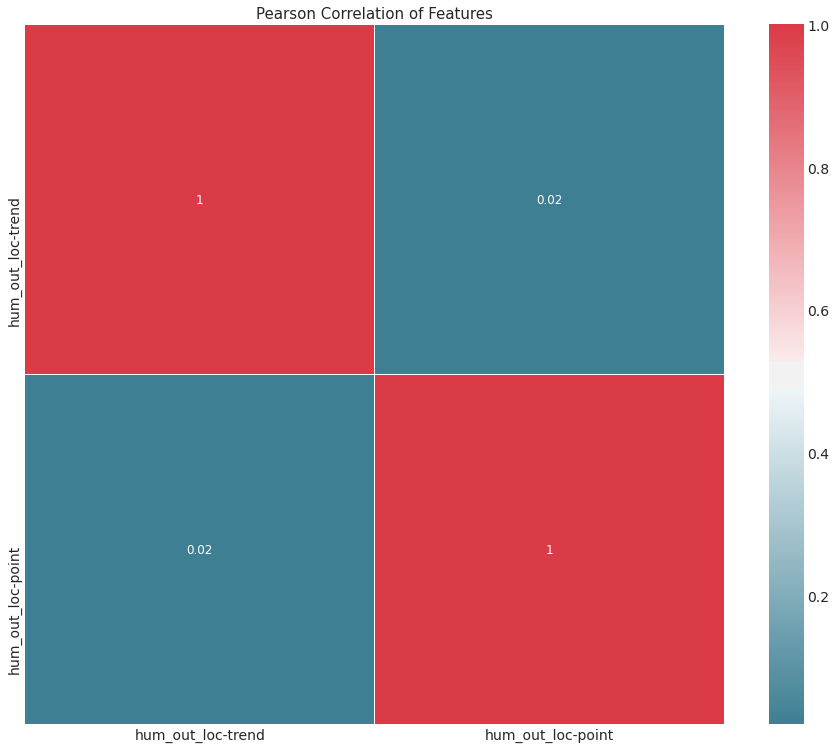

In [ ]:
cramers_correlation_heatmap(data_plant[['hum_out_loc-trend', 'hum_out_loc-point']])

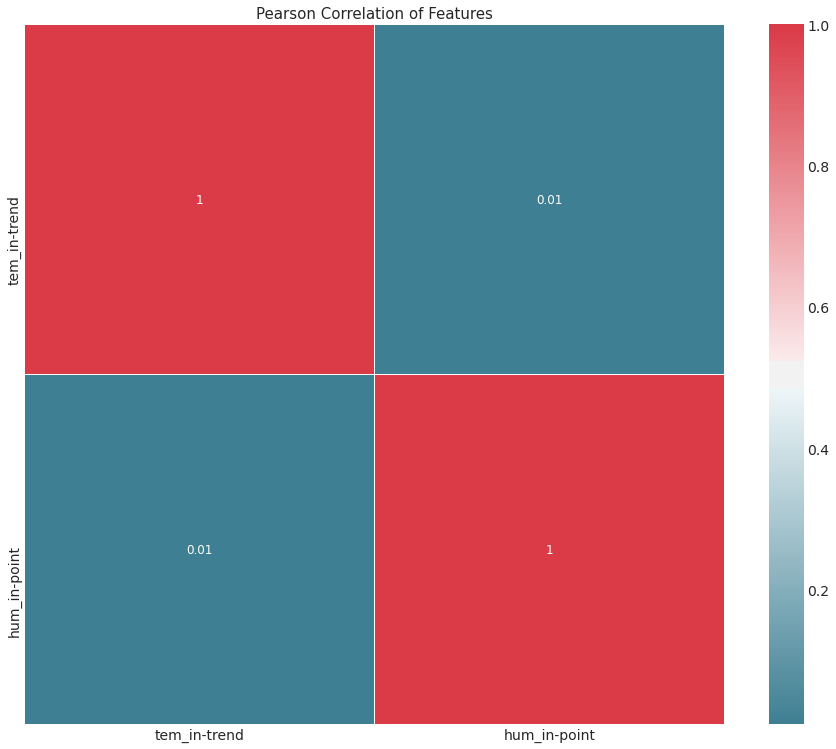

In [ ]:
cramers_correlation_heatmap(data_plant[['tem_in-trend', 'hum_in-point']])

In [ ]:
cramers_correlation_heatmap(data_plant[['tem_in-trend', 'hum_in-point']])

2017-01-01 작업중...
2018-01-01 작업중...
2019-01-01 작업중...
2020-01-01 작업중...


,mea_ddhr,date,time,ws,ws-pred
9,2017-12-01 00:10:00,2017-12-01,10.0,2.3,2.833333
19,2017-12-01 00:20:00,2017-12-01,20.0,2.9,2.866667
29,2017-12-01 00:30:00,2017-12-01,30.0,2.0,2.900000
39,2017-12-01 00:40:00,2017-12-01,40.0,2.6,2.933333
49,2017-12-01 00:50:00,2017-12-01,50.0,2.7,2.966667
...,...,...,...,...,...
2090523,2020-03-31 23:20:00,2020-03-31,1400.0,0.3,0.766667
2090533,2020-03-31 23:30:00,2020-03-31,1410.0,1.0,0.700000
2090543,2020-03-31 23:40:00,2020-03-31,1420.0,0.6,0.633333
2090553,2020-03-31 23:50:00,2020-03-31,1430.0,0.9,0.566667


In [ ]:
calc_R(AWS_DATA_WS, 'ws')

0.5937815710254837


0.7656917854058483

In [ ]:
AWS_DATA_RN = AWS_DATA[['mea_ddhr', 'date', 'time', 'rn']]
AWS_DATA_RN = AWS_DATA_RN.dropna()
AWS_DATA_RN

,mea_ddhr,date,time,rn
9,2017-12-01 00:10:00,2017-12-01,10.0,0.0
19,2017-12-01 00:20:00,2017-12-01,20.0,0.0
29,2017-12-01 00:30:00,2017-12-01,30.0,0.0
39,2017-12-01 00:40:00,2017-12-01,40.0,0.0
49,2017-12-01 00:50:00,2017-12-01,50.0,0.0
...,...,...,...,...
2090523,2020-03-31 23:20:00,2020-03-31,1400.0,0.0
2090533,2020-03-31 23:30:00,2020-03-31,1410.0,0.0
2090543,2020-03-31 23:40:00,2020-03-31,1420.0,0.0
2090553,2020-03-31 23:50:00,2020-03-31,1430.0,0.0


In [ ]:
AWS_DATA_RN = pred_weather(AWS_DATA_RN, 'rn')
AWS_DATA_RN

2017-01-01 작업중...
2018-01-01 작업중...
2019-01-01 작업중...
2020-01-01 작업중...


,mea_ddhr,date,time,rn,rn-pred
9,2017-12-01 00:10:00,2017-12-01,10.0,0.0,0.0
19,2017-12-01 00:20:00,2017-12-01,20.0,0.0,0.0
29,2017-12-01 00:30:00,2017-12-01,30.0,0.0,0.0
39,2017-12-01 00:40:00,2017-12-01,40.0,0.0,0.0
49,2017-12-01 00:50:00,2017-12-01,50.0,0.0,0.0
...,...,...,...,...,...
2090523,2020-03-31 23:20:00,2020-03-31,1400.0,0.0,0.0
2090533,2020-03-31 23:30:00,2020-03-31,1410.0,0.0,0.0
2090543,2020-03-31 23:40:00,2020-03-31,1420.0,0.0,0.0
2090553,2020-03-31 23:50:00,2020-03-31,1430.0,0.0,0.0


In [ ]:
calc_R(AWS_DATA_RN, 'rn')

0.7056586044678055


-468.665148605295

In [ ]:
def plot_interpolation(df, target, date):
  df_date = df[df['date'] == date]
  x = df_date['time']
  y = df_date[target]
  plt.plot(x, y)

In [ ]:
import datetime
date = datetime.datetime.strptime("2016-04-01 00:00:00", '%Y-%m-%d %H:%M:%S').date()
plot_interpolation(AWS_DATA, 'ta', date)

NameError: ignored